In [1]:
from nn.neural_network import NeuralNetwork

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

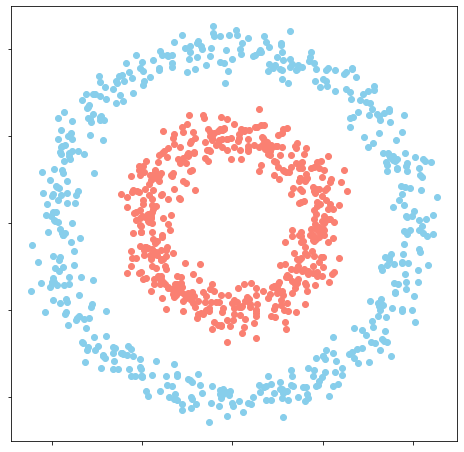

In [2]:
# Creamos nuestros datos artificiales, donde buscaremos clasificar 
# dos anillos concéntricos de datos. 
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.07)
# Visualización del mapa de predicción.
plt.figure(figsize=(8, 8))

# Visualización de la nube de datos.
plt.scatter(X[y == 0,0], X[y == 0,1], c="skyblue")
plt.scatter(X[y == 1,0], X[y == 1,1], c="salmon")
y = y[:,np.newaxis]

plt.tick_params(labelbottom=False, labelleft=False)

In [3]:
pd.DataFrame(y).value_counts()

0    500
1    500
dtype: int64

In [4]:
model = NeuralNetwork(loss_f='mse')

model.add_layer(n_conn=X.shape[1], n_neur=3, act_f='sigmoid')
model.add_layer(n_neur=8, act_f='sigmoid')
model.add_layer(n_neur=1, act_f='sigmoid')

In [5]:
model.fit(X, y, epoch=5000, lr=0.02)
yp = model.predict(X)
model.loss_f[0](yp, y)

0.14205236013345474